<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/front_page.png" width=50%>

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline


from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot


from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import log_loss, fbeta_score, make_scorer, confusion_matrix, roc_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")


## Load and Prepare Data

In [2]:
df = pd.read_csv('train.csv')

## EDA

In [3]:
print(df.columns)
df.info()
df.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
print(df.Cabin.isnull().sum() / len(df))
print(df.Age.isnull().sum() / len(df))
print(df.Embarked.isnull().sum() / len(df))

0.7710437710437711
0.19865319865319866
0.002244668911335578


## Data Preprocessing

In [26]:
df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [27]:
df['Sex']=df['Sex'].map({'male':0, 'female':1})

In [28]:
mapping_pclass = {1:1, 2:0, 3:-1}
df['Pclass'] = df['Pclass'].map(mapping_pclass)

In [29]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [30]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [31]:
df.Embarked.replace(np.nan, 'S', inplace = True)

In [32]:
df.Age.replace(np.nan, df.Age.mean(), inplace = True)

In [33]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [34]:
df = pd.get_dummies(df)
df.shape

(891, 10)

In [35]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,-1,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,-1,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,-1,0,35.0,0,0,8.0500,0,0,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


In [37]:
y = df['Survived']
x = df.drop('Survived', axis=1)

In [38]:
print(x.shape, y.shape)

(891, 9) (891,)


In [39]:
x_tr, x_test, y_tr, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_tr = sc.fit_transform(x_tr)
x_test = sc.transform(x_test)

## Strorytelling - Visualization

In [6]:
survivors = df.Survived.sum()
unsurvivors = len(df) - survivors

print( survivors, 'people survived.')
print( unsurvivors, 'people did not survive.')

342 people survived.
549 people did not survive.


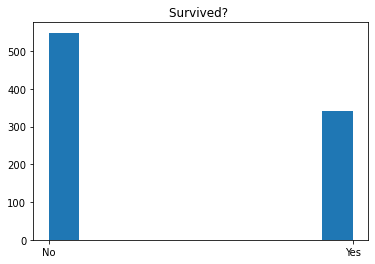

In [7]:
plt.hist(df.Survived)
plt.title('Survived? ')
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

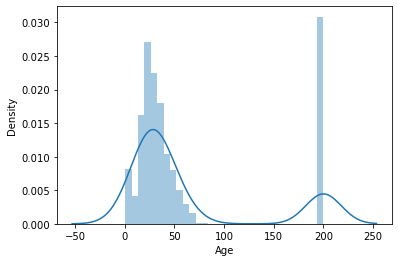

In [8]:
sns.distplot(df.Age.fillna(200))

In [9]:
df[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [10]:
df[['Sex', 'Survived']].groupby('Sex').mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [11]:
df[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [12]:
df[['Embarked', 'Pclass']].groupby('Embarked').mean().sort_values(by='Pclass', ascending=False)

,Pclass
Embarked,
Q,2.909091
S,2.350932
C,1.886905


In [13]:
df[["Parch", "Survived"]].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [14]:
df[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [15]:
df[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<AxesSubplot:xlabel='Age', ylabel='Density'>

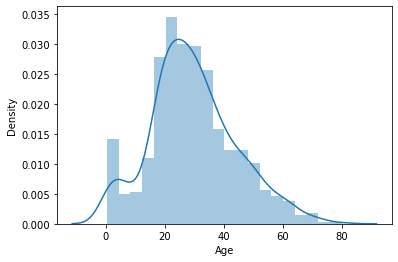

In [16]:
sns.distplot(df.Age.dropna())

<AxesSubplot:xlabel='Fare', ylabel='Density'>

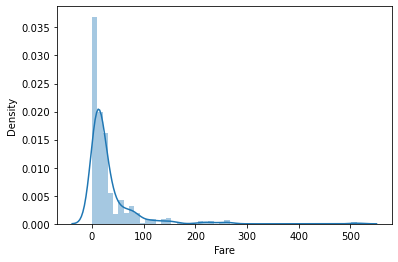

In [17]:
sns.distplot(df.Fare.dropna())

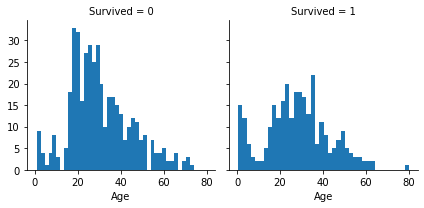

In [18]:
num = sns.FacetGrid(df, col='Survived')
print(num.map(plt.hist, 'Age', bins=40))

<AxesSubplot:>

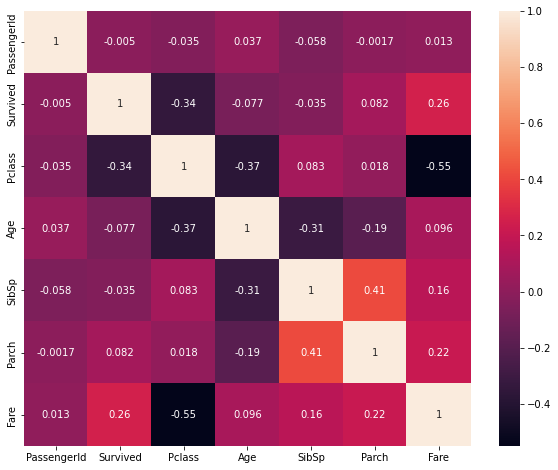

In [19]:
mcorr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(mcorr,annot=True)

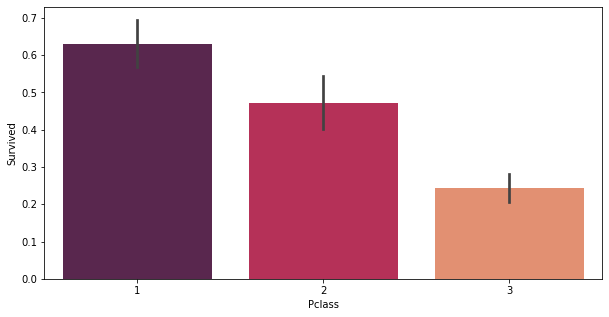

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x = 'Pclass', y = 'Survived', palette='rocket');

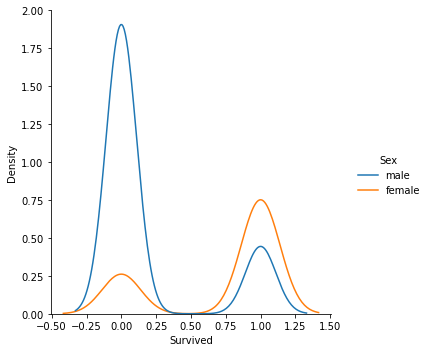

In [21]:
sns.displot(df, x="Survived", hue='Sex',kind="kde")

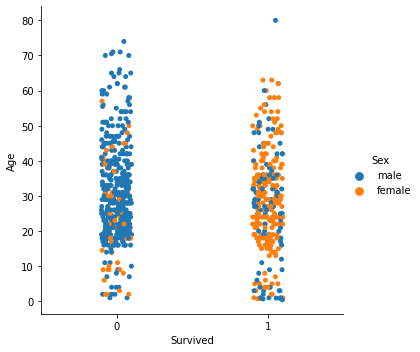

In [22]:
sns.catplot(x="Survived", y="Age", hue = 'Sex', data=df)

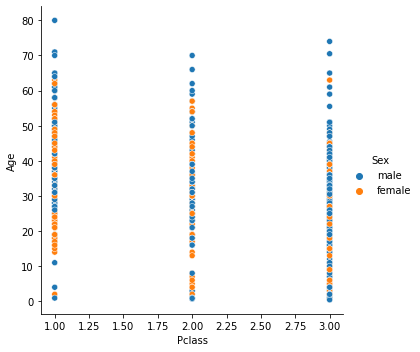

In [23]:
sns.relplot(x="Pclass", y="Age", hue = 'Sex', data=df)

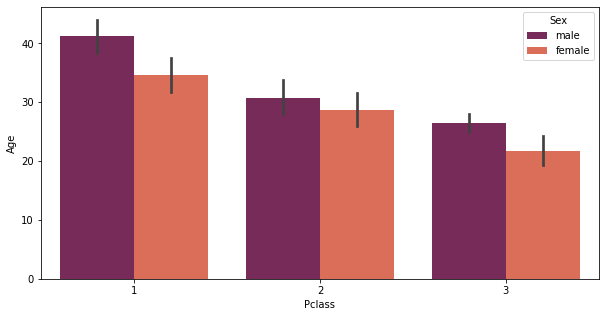

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x = 'Pclass', y = 'Age', hue = 'Sex', palette='rocket');

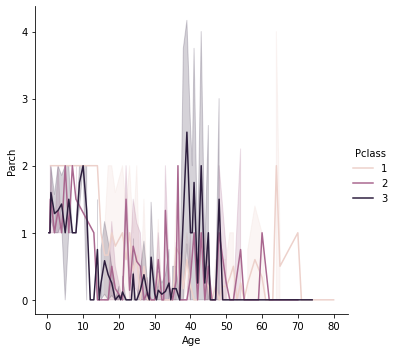

In [25]:
sns.relplot(x="Age", y="Parch", hue="Pclass",kind='line', data=df)

## Train your model (Classification)

In [41]:
models = list()

models.append(LogisticRegression())
models.append(DecisionTreeClassifier())
models.append(RandomForestClassifier())
models.append(SVC())
models.append(ExtraTreesClassifier())
models.append(GradientBoostingClassifier())
models.append(AdaBoostClassifier(DecisionTreeClassifier(),learning_rate=0.1))
models.append(KNeighborsClassifier())
models.append(XGBClassifier())

In [42]:
kfold = StratifiedKFold(n_splits=10)

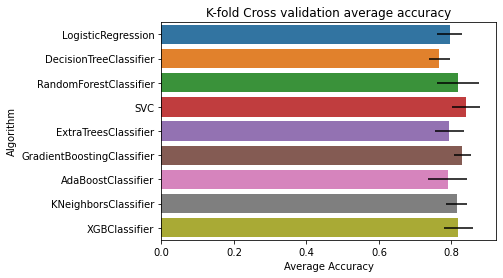

In [43]:
cv_results = []
cv_names = []

for model in models :
    cv_results.append(cross_val_score(model, x_tr, y = y_tr, scoring = "accuracy", cv = kfold, n_jobs=6))
    cv_names.append(model.__class__.__name__)

cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":cv_names})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res,orient = "h",**{'xerr':cv_std})
g.set_xlabel("Average Accuracy")
g = g.set_title("K-fold Cross validation average accuracy")

In [44]:
cv_res['criterion'] = cv_res.CrossValMeans - cv_res.CrossValerrors/2
cv_res.sort_values(by='criterion', ascending=False)

,CrossValMeans,CrossValerrors,Algorithm,criterion
3,0.840063,0.039420,SVC,0.820352
5,0.830125,0.024161,GradientBoostingClassifier,0.818045
7,0.814710,0.029271,KNeighborsClassifier,0.800075
8,0.818955,0.040714,XGBClassifier,0.798599
2,0.817567,0.057783,RandomForestClassifier,0.788675
0,0.795051,0.033788,LogisticRegression,0.778157
4,0.793623,0.040336,ExtraTreesClassifier,0.773455
6,0.789476,0.053426,AdaBoostClassifier,0.762763
1,0.766862,0.029581,DecisionTreeClassifier,0.752072


In [45]:
# Logistic Regression Parameters tunning
LR = LogisticRegression( )

penalty = ['10', 'l1', 'l2', '13', '14']

C = np.logspace(-2, 2, 100, 64, 128)


lr_param_grid = {'penalty': penalty, 'C': C }

clf = GridSearchCV(LogisticRegression(), lr_param_grid)

gsLR = GridSearchCV(LR,param_grid = lr_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsLR.fit(x_tr, y_tr)

LR_best = gsLR.best_estimator_

print('Best Penalty:', LR_best.get_params()['penalty'])
print('Best C:', LR_best.get_params()['C'])

gsLR.best_score_

Fitting 10 folds for each of 500 candidates, totalling 5000 fits
Best Penalty: l2
Best C: 0.014773873285974445


0.8133411580594678

In [46]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1400, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [ 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [ 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

rf_param_grid = {"max_depth": max_depth,
              "max_features": max_features,
              "min_samples_split": min_samples_split,
              "min_samples_leaf": min_samples_leaf,
              "bootstrap": bootstrap,
              "n_estimators" :n_estimators,
              "criterion": ["entropy"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(x_tr, y_tr)



Fitting 10 folds for each of 384 candidates, totalling 3840 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'criterion': ['entropy'],
                         'max_depth': [1, 5, 10, 15, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [200, 600, 1000, 1400]},
             scoring='accuracy', verbose=1)

In [47]:
RFC_best = gsRFC.best_estimator_

print(RFC_best.get_params())


gsRFC.best_score_

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


0.8498043818466353

In [48]:
# Gradient boosting tunning


#shrinks the contribution of each tree by learning_rate.
learning_rates = [1, 0.25, 0.1, 0.05, 0.01]
#the number of trees in the forest
n_estimators = [1, 2, 4,  32, 100, 150, 200,  300]
# how deep the built tree can be
max_depths = np.linspace(1, 32, 8, endpoint=True)

#minimum number of samples required to be at a leaf node.
min_samples_leafs =  np.linspace(0.1, 0.5, 4, endpoint=True)
#represents the number of features to consider when looking for the best split
max_features = [0.5, 0.3, 0.1]

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : n_estimators,
              'learning_rate': learning_rates,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leafs,
              'max_features': max_features
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(x_tr, y_tr)

GBC_best = gsGBC.best_estimator_

print(GBC_best.get_params())


gsGBC.best_score_

Fitting 10 folds for each of 3840 candidates, totalling 38400 fits
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.25, 'loss': 'deviance', 'max_depth': 32.0, 'max_features': 0.3, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 0.1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


0.8343505477308295

In [49]:
### SVC classifier
SVMC = SVC(probability=True)

Cs = [0.001, 0.01, 0.1, 1, 10, 50, 100,200,300, 1000, 3000]
gammas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1 ]
    
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': gammas,
                  'C': Cs}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(x_tr, y_tr)

SVMC_best = gsSVMC.best_estimator_

print(SVMC_best.get_params())


gsSVMC.best_score_

Fitting 10 folds for each of 66 candidates, totalling 660 fits
{'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


0.8427621283255086

In [50]:
### XGB classifier

XGB = XGBClassifier()



max_depth = [1,2,4,8,10]
min_child_weight = np.linspace(1, 10, 5, endpoint=True) 

gamma = np.linspace(0.5, 5, 5, endpoint=True)
subsample = np.linspace(0.5, 1, 5, endpoint=True)
colsample_bytree = np.linspace(0.5, 1, 5, endpoint=True)

XGB_param_grid = {
        'min_child_weight': min_child_weight,
        'gamma': gamma,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'max_depth': max_depth
        }


gsXGB = GridSearchCV(estimator = XGB, 
                    param_grid = XGB_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)


gsXGB.fit(x_tr, y_tr)

XGB_best = gsXGB.best_estimator_
print(XGB_best.get_params())

gsXGB.best_score_

Fitting 10 folds for each of 3125 candidates, totalling 31250 fits
[15:48:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'objective': 'binary:logistic', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1.0, 'enable_categorical': False, 'gamma': 1.625, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 2, 'min_child_weight': 5.5, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 8, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1.0, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


0.8469874804381845

## Test Result

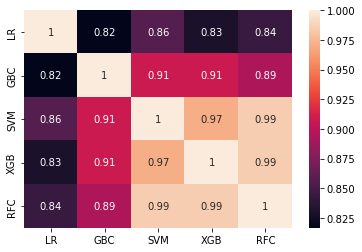

In [51]:
test_Survived_LR = pd.Series(LR_best.predict(x_test), name="LR")
test_Survived_RFC = pd.Series(RFC_best.predict(x_test), name="RFC")
test_Survived_GBC = pd.Series(GBC_best.predict(x_test), name="GBC")
test_Survived_SVM = pd.Series(SVMC_best.predict(x_test), name="SVM")
test_Survived_XGB = pd.Series(XGB_best.predict(x_test), name="XGB")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_LR, 
                              test_Survived_GBC,
                              test_Survived_SVM, 
                              test_Survived_XGB, 
                              test_Survived_RFC], axis=1)


g= sns.heatmap(ensemble_results.corr(), annot = True)

In [53]:
print('test score LR:', gsLR.best_score_)
print('test score RFC:', gsRFC.best_score_)
print('test score GBC:', gsGBC.best_score_)
print('test score SVMC:', gsSVMC.best_score_)
print('test score XGB:', gsXGB.best_score_)

test score LR: 0.8133411580594678
test score RFC: 0.8498043818466353
test score GBC: 0.8343505477308295
test score SVMC: 0.8427621283255086
test score XGB: 0.8469874804381845
